In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
x_train = np.loadtxt('/content/drive/MyDrive/Copy of input.csv',delimiter = ',')

In [ ]:
y_train = np.loadtxt('/content/drive/MyDrive/Copy of labels.csv',delimiter = ',')

In [ ]:
x_test = np.loadtxt('/content/drive/MyDrive/Copy of input_test.csv',delimiter = ',')

In [ ]:
y_test = np.loadtxt('/content/drive/MyDrive/Copy of labels_test.csv',delimiter = ',')

In [ ]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

In [ ]:
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [ ]:
x_train=x_train/255.0 

x_test = x_test/255.0

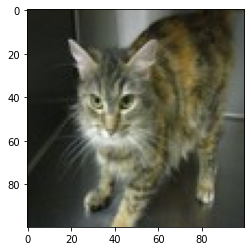

In [ ]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [ ]:
model=Sequential([
    Conv2D(256,(3,3),activation='relu',input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')


])

In [ ]:
opt=SGD(momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test))

63/63 [==============================] - 307s 5s/step - loss: 0.7081 - accuracy: 0.5890 - val_loss: 0.6963 - val_accuracy: 0.5175


In [ ]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 12s 954ms/step - loss: 0.6963 - accuracy: 0.5175


[0.6962512135505676, 0.5174999833106995]

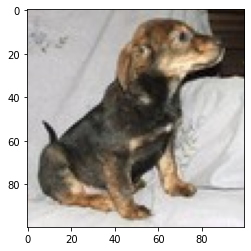

In [ ]:
idx2=random.randint(0, len(y_test)) 
plt.imshow(x_test[idx2,:])
plt.show()

In [ ]:
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3)) 
y_pred = y_pred > 0.5

if(y_pred==0): 
    pred ='dog'

else:
    pred ='cat'
    
print("Our model says it is a", pred)

1/1 [==============================] - 0s 55ms/step
Our model says it is a dog


In [ ]:
model.evaluate(x_test,y_test,verbose=0)

[0.6962512135505676, 0.5174999833106995]